In [55]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('data.csv')
print(len(df))
df.head()

505


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [37]:
model = DecisionTreeRegressor()

In [38]:
X_columns = [x for x in df.columns if x != 'MEDV']
y_column = 'MEDV'

In [39]:
df = df.sample(frac=1)
n = int(0.8*len(df))
train_df = df[:n]
test_df = df[n:]

In [40]:
model.fit(train_df[X_columns], train_df[y_column])

DecisionTreeRegressor()

In [41]:
pred = model.predict(test_df[X_columns])

In [44]:
mse = mean_squared_error(test_df[y_column], pred)

In [45]:
mse

10.471386138613862

In [46]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [47]:
model.get_n_leaves()

385

array([12,  5,  7, -2,  5,  9,  7, -2, -2,  5,  2,  8, 10,  0, 12, -2, -2,
        9, -2,  9, -2, -2, 12, -2,  7,  9, -2, 11,  1, -2, -2,  2,  0,  2,
       -2, -2, 12, -2,  8, -2, -2,  5, -2,  5, 12, -2, -2, -2, -2, -2, 10,
        0, -2, -2, -2,  5,  2,  5,  2, 11,  0,  1, -2, -2,  7, -2, -2, 12,
       -2, 12, 12,  9, -2, -2, -2,  4, -2, -2,  0, -2,  5, -2, -2, 12,  2,
        9, -2, -2, -2,  0, -2, -2, 10, 10,  7, 10, -2, -2, -2, -2,  6, 12,
        9, 12,  6, 10, -2, -2, -2, -2,  5,  9,  7, -2, -2, -2,  0,  6, -2,
       -2,  4, -2, -2, -2,  5, 11, -2, -2, 11,  4,  6, -2, -2, -2,  8, -2,
        6, -2,  2, -2, -2, -2, 12,  4, 10, 11, 12,  4, -2, -2,  5,  2, -2,
        9,  6, -2, -2, -2, -2,  6, -2,  7,  1, -2, -2, -2,  2, 12, -2, -2,
       -2, -2,  7, 10, 12,  4, -2,  4, -2, -2, 10, 11, -2,  7, -2, -2,  6,
       -2, -2, -2,  1, 11,  7, -2,  2,  8, -2, -2, -2, -2,  7,  7,  5, -2,
        5, -2, -2, 10,  4, -2, -2, -2, -2,  5,  7, 10, -2, -2, 10,  9,  9,
       11, -2, -2, 10,  7

In [49]:
features = model.tree_.feature
th = model.tree_.threshold
print(features.shape, th.shape)

(769,) (769,)


In [51]:
first_feature = X_columns[features[0]]
first_feature, th[0]

('LSTAT', 9.724999904632568)

29.813744075829387 17.343537414965986


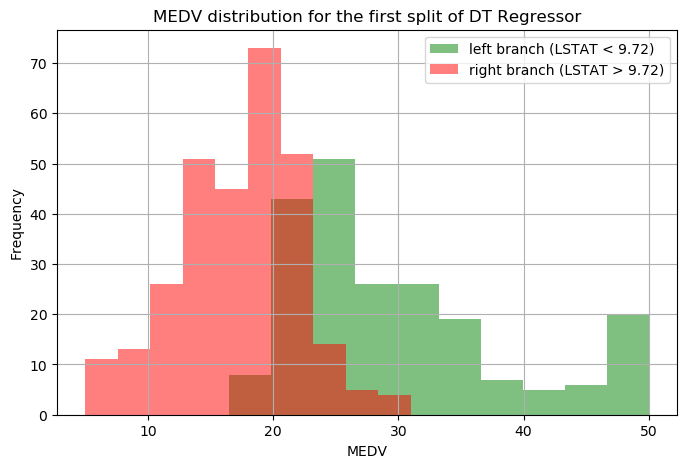

In [57]:
lower = df[df[first_feature] < th[0]]
upper = df[df[first_feature] > th[0]]
print(lower[y_column].mean(), upper[y_column].mean())
A = 0.5
plt.figure(figsize=(8, 5))
plt.title('MEDV distribution for the first split of DT Regressor')
lower[y_column].hist(color='green', label='left branch (LSTAT < 9.72)', alpha=A)
upper[y_column].hist(color='red', label='right branch (LSTAT > 9.72)', alpha=A)
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.legend()